Importing necessary libraries

In [12]:
import pandas as pd       #data processing
import numpy as np        #linear algebra
#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings; warnings.simplefilter('ignore')

Importing the Dataset

In [2]:
data=pd.read_csv("nyc_taxi_trip_duration.csv")

Exploring the Dataset

In [3]:
data.shape

(729322, 11)

In [4]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [5]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

1. We have id, pickup_datetime, dropoff_datetime, and store_and_fwd_flag of the type ‘object’.
2. vendor_id, passenger_count, and trip_duration are of type int.
3. pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude are of type float.

In [6]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,29-02-2016 16:40,29-02-2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,11-03-2016 23:35,11-03-2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,21-02-2016 17:59,21-02-2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,05-01-2016 09:44,05-01-2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,17-02-2016 06:42,17-02-2016 06:56,1,-74.017120,40.708469,-73.988182,40.740631,N,848


Independent Variables:

1. id — a unique identifier for each trip
2. vendor_id — a code indicating the provider associated with the trip record
3. pickup_datetime — date and time when the meter was engaged
4. dropoff_datetime — date and time when the meter was disengaged
5. passenger_count — the number of passengers in the vehicle (driver entered value)
6. pickup_longitude — the longitude where the meter was engaged
7. pickup_latitude — the latitude where the meter was engaged
8. dropoff_longitude — the longitude where the meter was disengaged
9. dropoff_latitude — the latitude where the meter was disengaged
10. store_and_fwd_flag — This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip.

Target Variable:

11. trip_duration — duration of the trip in seconds

To check for null values in dataset

In [7]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There are no null values in this dataset which saves us a step of imputing.

To check for unique values in dataset

In [8]:
data.nunique()

id                    729322
vendor_id                  2
pickup_datetime       223893
dropoff_datetime      224158
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

1. We see that id has 729322 unique values which are equal to the number of rows in our dataset.
2. There are 2 unique vendor ids.
3. There are 9 unique passenger counts.
4. There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N.

Check for a statistical summary of our dataset.
Describe function can provide statistics for numerical features only.

In [11]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712235,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


Some insights from the above summary:

1. Vendor id has a minimum value of 1 and a maximum value of 2 which makes sense as we saw there are two vendor ids 1 and 2.
2. Passenger count has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.
3. The minimum trip duration is also quite low. We will come back to this later during Univariate Analysis.

pickup_datetime and dropoff_datetime were both of type object. Convert it to datetime to extract and create new features from this datetime features

In [10]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [13]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [14]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()
data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour
data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

In [15]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month
0,id1080784,2,2016-02-29 16:40:00,2016-02-29 16:47:00,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,0,0,16,16,2,2
1,id0889885,1,2016-11-03 23:35:00,2016-11-03 23:53:00,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Thursday,Thursday,3,3,23,23,11,11
2,id0857912,2,2016-02-21 17:59:00,2016-02-21 18:26:00,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,6,6,17,18,2,2
3,id3744273,2,2016-05-01 09:44:00,2016-05-01 10:03:00,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Sunday,Sunday,6,6,9,10,5,5
4,id0232939,1,2016-02-17 06:42:00,2016-02-17 06:56:00,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,2,2,6,6,2,2


We have created the following features:

1. pickup_day and dropoff_day which will contain the name of the day on which the ride was taken.
2. pickup_day_no and dropoff_day_no which will contain the day number instead of characters with Monday=0 and Sunday=6.
3. pickup_hour and dropoff_hour with an hour of the day in the 24-hour format.
4. pickup_month and dropoff_month with month number with January=1 and December=12.

Now, will define a function that lets us determine what time of the day the ride was taken. I have created 4 time zones ‘Morning’ (from 6:00 am to 11:59 pm), ‘Afternoon’ (from 12 noon to 3:59 pm), ‘Evening’ (from 4:00 pm to 9:59 pm), and ‘Late Night’ (from 10:00 pm to 5:59 am)

In [16]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

Now let us apply this function and create new columns in the dataset.

In [17]:
data['pickup_timeofday'] = data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday'] = data['dropoff_hour'].apply(time_of_day)

In [18]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
0,id1080784,2,2016-02-29 16:40:00,2016-02-29 16:47:00,1,-73.953918,40.778873,-73.963875,40.771164,N,...,Monday,Monday,0,0,16,16,2,2,Evening,Evening
1,id0889885,1,2016-11-03 23:35:00,2016-11-03 23:53:00,2,-73.988312,40.731743,-73.994751,40.694931,N,...,Thursday,Thursday,3,3,23,23,11,11,Late night,Late night
2,id0857912,2,2016-02-21 17:59:00,2016-02-21 18:26:00,2,-73.997314,40.721458,-73.948029,40.774918,N,...,Sunday,Sunday,6,6,17,18,2,2,Evening,Evening
3,id3744273,2,2016-05-01 09:44:00,2016-05-01 10:03:00,6,-73.961670,40.759720,-73.956779,40.780628,N,...,Sunday,Sunday,6,6,9,10,5,5,Morning,Morning
4,id0232939,1,2016-02-17 06:42:00,2016-02-17 06:56:00,1,-74.017120,40.708469,-73.988182,40.740631,N,...,Wednesday,Wednesday,2,2,6,6,2,2,Morning,Morning


We also saw during dataset exploration that we have coordinates in the form of longitude and latitude for pickup and dropoff. But, we can’t really gather any insights or draw conclusions from that.
So, the most obvious feature that we can extract from this is distance.

Importing the library which lets us calculate distance from geographical coordinates. To import geopy library, first we need to install it as it is not an in-built library in Python.

In [20]:
#pip install geopy

In [21]:
from geopy.distance import great_circle

Defining a function to take coordinates as inputs and return us distance.

In [23]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

Finally, applying the function to our dataset and creating the feature ‘distance’.

In [25]:
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [26]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
0,id1080784,2,2016-02-29 16:40:00,2016-02-29 16:47:00,1,-73.953918,40.778873,-73.963875,40.771164,N,...,Monday,0,0,16,16,2,2,Evening,Evening,1.199074
1,id0889885,1,2016-11-03 23:35:00,2016-11-03 23:53:00,2,-73.988312,40.731743,-73.994751,40.694931,N,...,Thursday,3,3,23,23,11,11,Late night,Late night,4.129117
2,id0857912,2,2016-02-21 17:59:00,2016-02-21 18:26:00,2,-73.997314,40.721458,-73.948029,40.774918,N,...,Sunday,6,6,17,18,2,2,Evening,Evening,7.250763
3,id3744273,2,2016-05-01 09:44:00,2016-05-01 10:03:00,6,-73.961670,40.759720,-73.956779,40.780628,N,...,Sunday,6,6,9,10,5,5,Morning,Morning,2.361100
4,id0232939,1,2016-02-17 06:42:00,2016-02-17 06:56:00,1,-74.017120,40.708469,-73.988182,40.740631,N,...,Wednesday,2,2,6,6,2,2,Morning,Morning,4.328540


Thus, we successfully created some new features which we will analyze in univariate and bivariate analysis.

Univariate Analysis

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

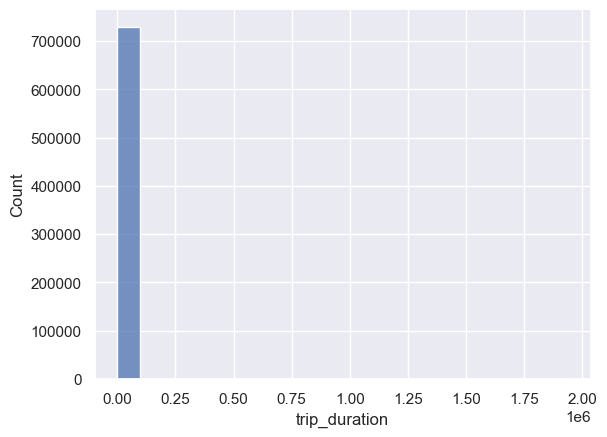

In [27]:
sns.histplot(data['trip_duration'],kde=False,bins=20)

The histogram is really skewed as we can see.

<AxesSubplot:xlabel='trip_duration'>

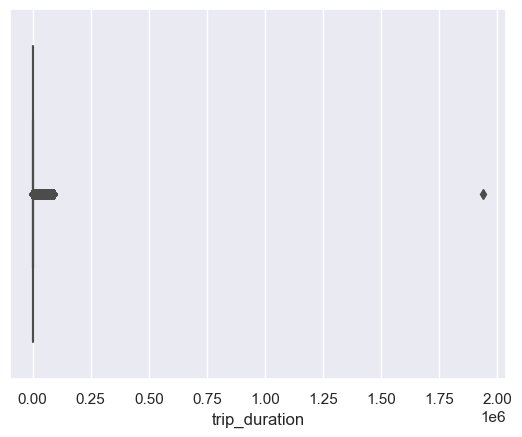

In [29]:
sns.boxplot(data['trip_duration'])

We can clearly see an outlier.

In [30]:
data['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
672240          1
102646          1
533760          1
512833          1
622664          1
Name: trip_duration, Length: 729322, dtype: int64

We can see that there is an entry which is significantly different from others.

As there is a single row only, let us drop this row.

In [31]:
data.drop(data[data['trip_duration'] == 1939736].index, inplace = True)

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

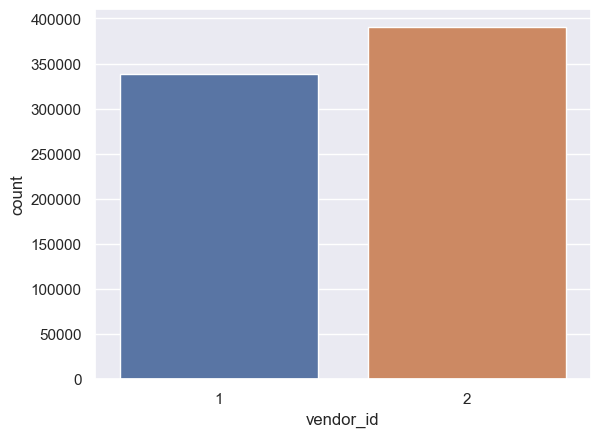

In [32]:
sns.countplot(x='vendor_id',data=data)

We see that there is not much difference between the trips taken by both vendors.

In [33]:
data.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

1. There are some trips with even 0 passenger count.
2. There is only 1 trip each for 7 and 9 passengers.

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

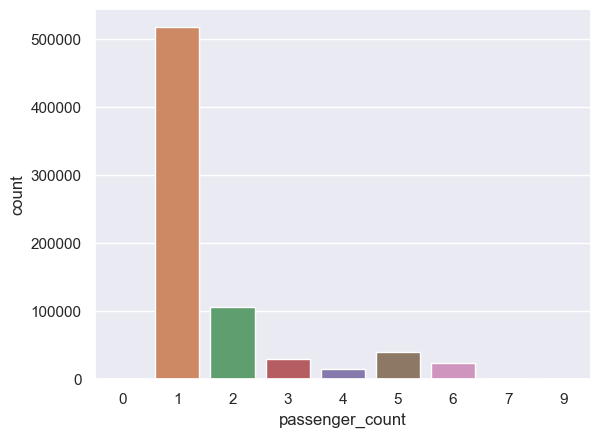

In [35]:
sns.countplot(x='passenger_count',data=data)

We see the highest amount of trips are with 1 passenger.

Let us remove the rows which have 0 or 7 or 9 passenger count.

In [36]:
data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

In [37]:
data.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

Now, that seems like a fair distribution.

In [38]:
data['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994463
Y    0.005537
Name: store_and_fwd_flag, dtype: float64

We see there are less than 1% of trips that were stored before forwarding.

In [39]:
data['distance'].value_counts()

0.000000     2893
0.000425       16
0.000848       15
0.000424       13
0.001272       13
             ... 
1.107790        1
2.688127        1
2.457477        1
10.326845       1
5.945845        1
Name: distance, Length: 726233, dtype: int64

We see there are 2893 trips with 0 km distance.

The reasons for 0 km distance can be:

1. The dropoff location couldn’t be tracked.
2. The driver deliberately took this ride to complete a target ride number.
3. The passengers canceled the trip.

We will analyze these trips further in bivariate analysis.

Trips per Day

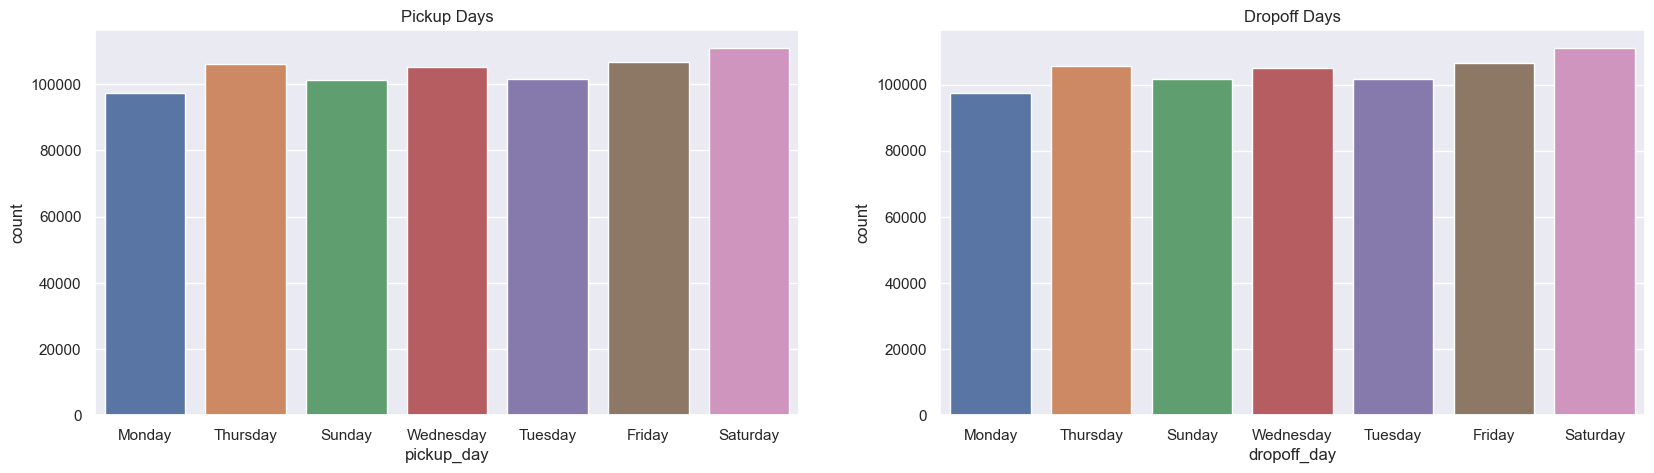

In [40]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=data,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=data,ax=ax2)

We see Fridays are the busiest days followed by Saturdays. That is probably because it’s weekend.

Trips per Hour

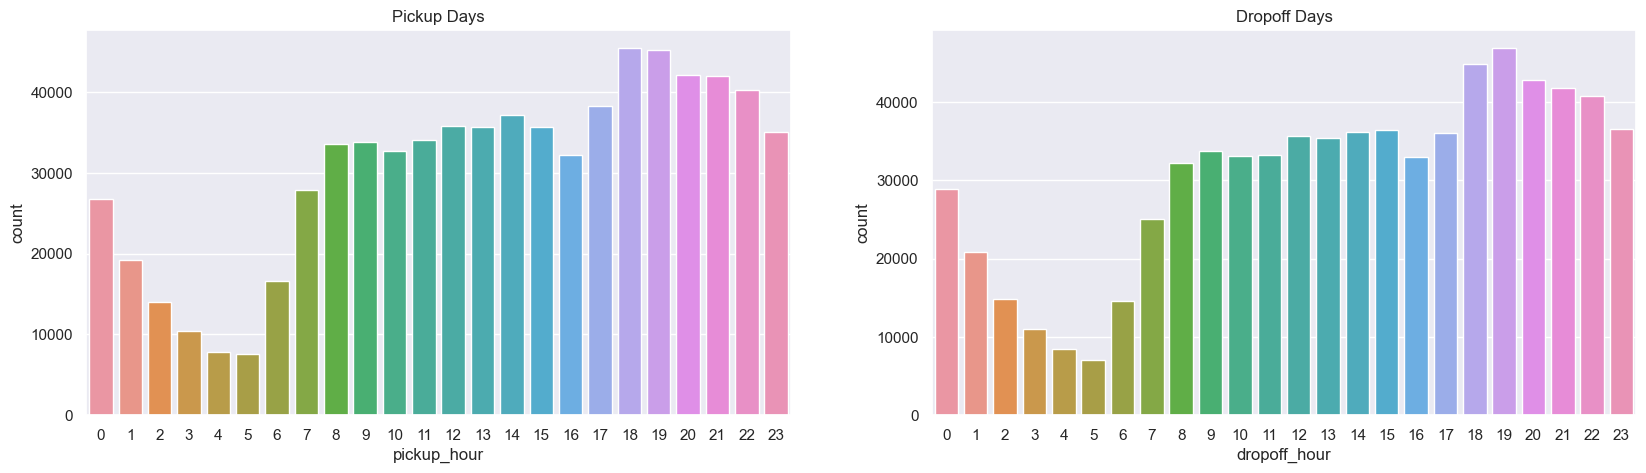

In [41]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=data,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=data,ax=ax10)

We see the busiest hours are 6:00 pm to 7:00 pm and that makes sense as this is the time when people return from their offices.

Trips per Time of Day

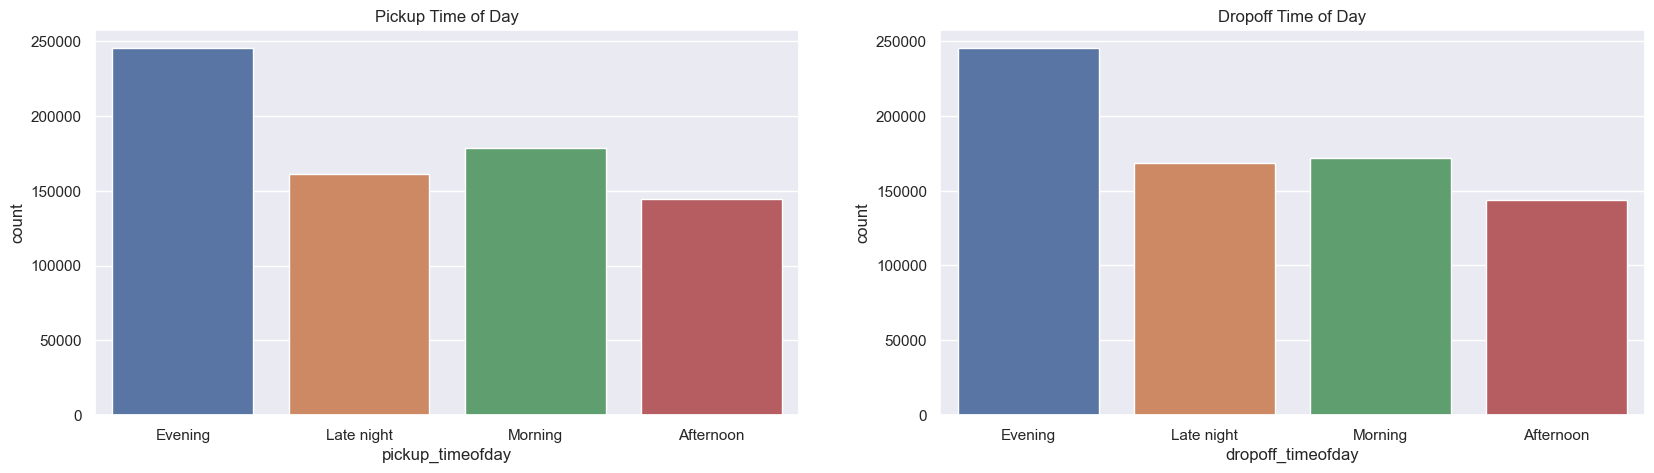

In [42]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=data,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=data,ax=ax4)

As we saw above, evenings are the busiest.

Trips per Month

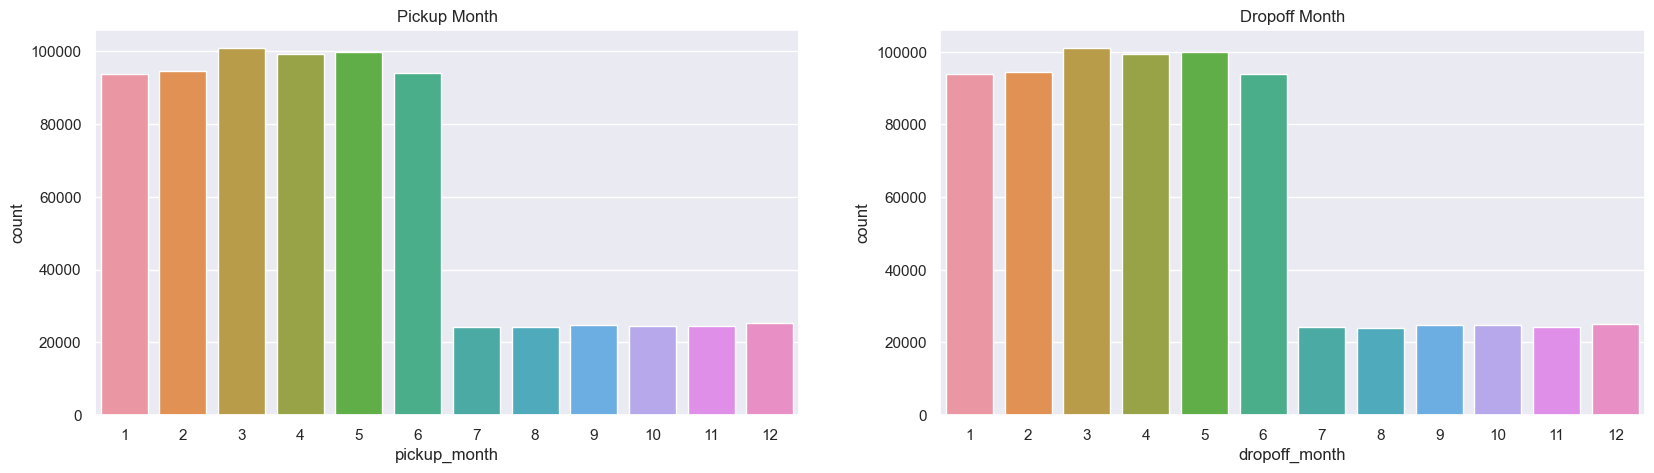

In [43]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))
ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=data,ax=ax11)
ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=data,ax=ax12)

There is not much difference in the number of trips across months. 

Now, we will analyze all these variables further in bivariate analysis.

Bivariate Analysis

Trip Duration per Vendor

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

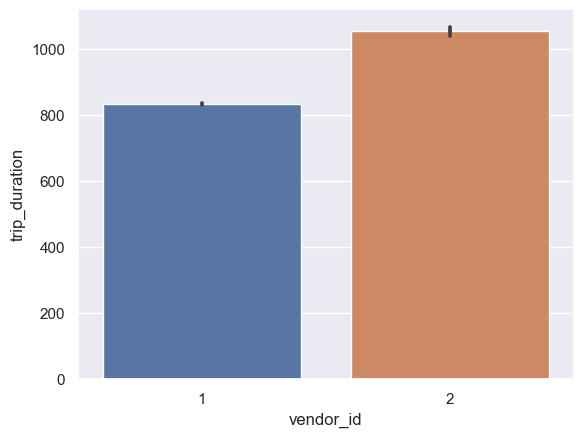

In [44]:
sns.barplot(y='trip_duration',x='vendor_id',data=data,estimator=np.mean)

Vendor id 2 takes longer trips as compared to vendor 1.

Trip Duration per Store and Forward Flag

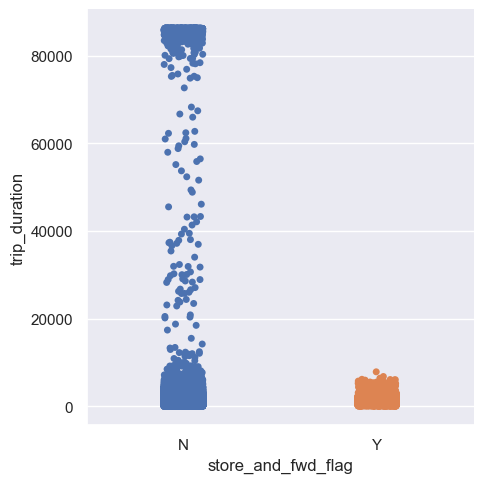

In [46]:
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=data,kind="strip")

Trip duration is generally longer for trips whose flag was not stored.

Trip Duration per passenger count

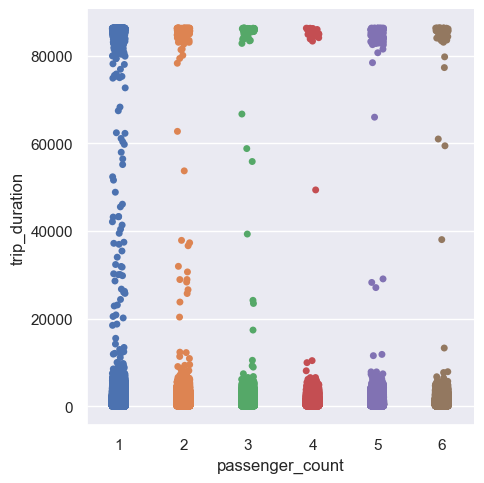

In [48]:
sns.catplot(y='trip_duration',x='passenger_count',data=data,kind="strip")

There is no visible relation between trip duration and passenger count.

Trip Duration per hour

<AxesSubplot:xlabel='pickup_hour', ylabel='trip_duration'>

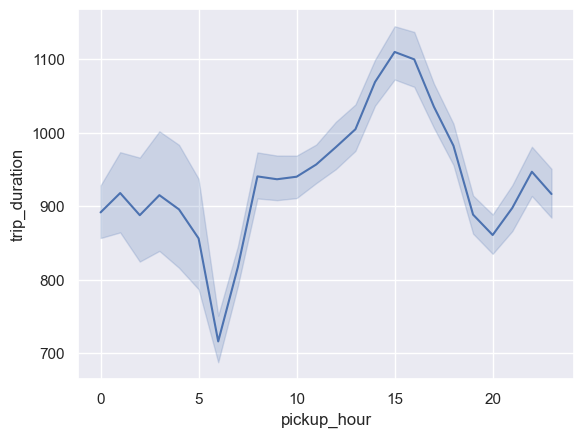

In [50]:
sns.lineplot(x='pickup_hour',y='trip_duration',data=data)

We see the trip duration is the maximum around 3 pm which may be because of traffic on the roads.
Trip duration is the lowest around 6 am as streets may not be busy.

Trip Duration per time of day

<AxesSubplot:xlabel='pickup_timeofday', ylabel='trip_duration'>

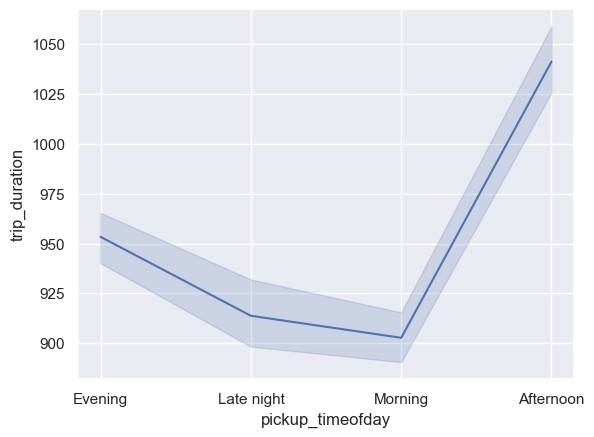

In [52]:
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=data)

As we saw above, trip duration is the maximum in the afternoon and lowest between late night and morning.

Trip Duration per Day of Week

<AxesSubplot:xlabel='pickup_day_no', ylabel='trip_duration'>

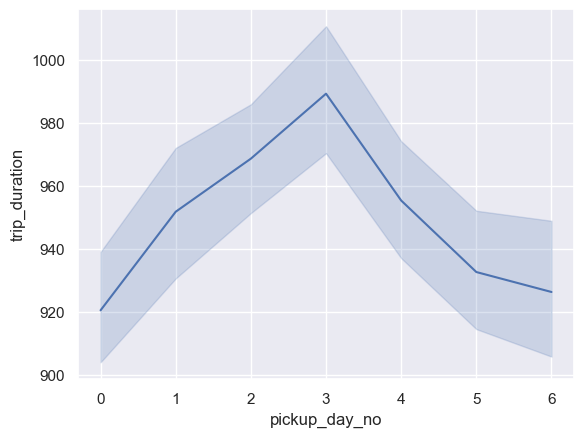

In [53]:
sns.lineplot(x='pickup_day_no',y='trip_duration',data=data)

Trip duration is the longest on Thursdays closely followed by Fridays.

Trip Duration per month

<AxesSubplot:xlabel='pickup_month', ylabel='trip_duration'>

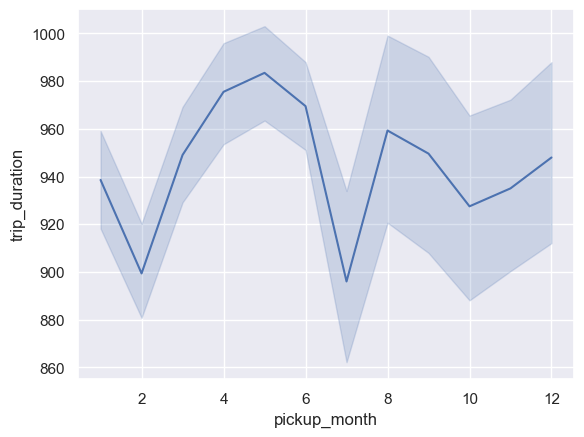

In [54]:
sns.lineplot(x='pickup_month',y='trip_duration',data=data)

From February, we can see trip duration rising every month.

Distance and Vendor

<AxesSubplot:xlabel='vendor_id', ylabel='distance'>

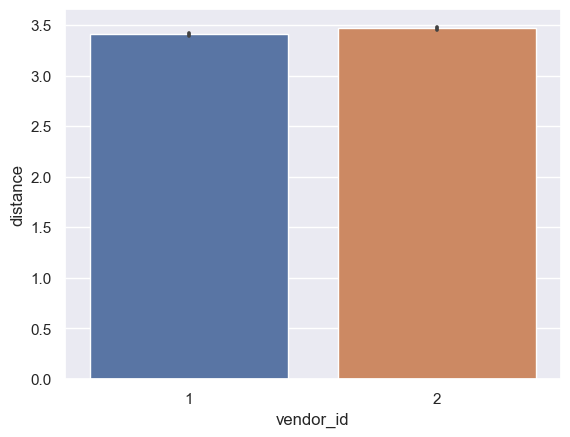

In [55]:
sns.barplot(y='distance',x='vendor_id',data=data,estimator=np.mean)

The distribution for both vendors is very similar.

Distance and Store and Forward Flag

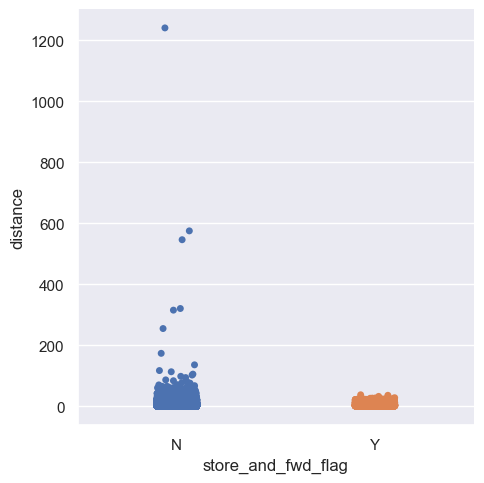

In [56]:
sns.catplot(y='distance',x='store_and_fwd_flag',data=data,kind="strip")

We see for longer distances the trip is not stored.

Distance per passenger count

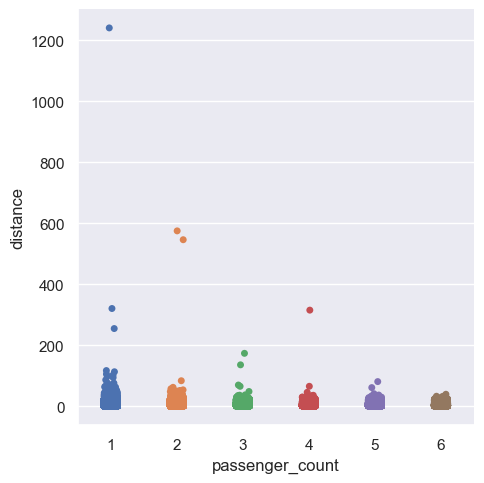

In [57]:
sns.catplot(y='distance',x='passenger_count',data=data,kind="strip")

We see some of the longer distances are covered by either 1 or 2 or 4 passenger rides.

Distance per day of week

<AxesSubplot:xlabel='pickup_day_no', ylabel='distance'>

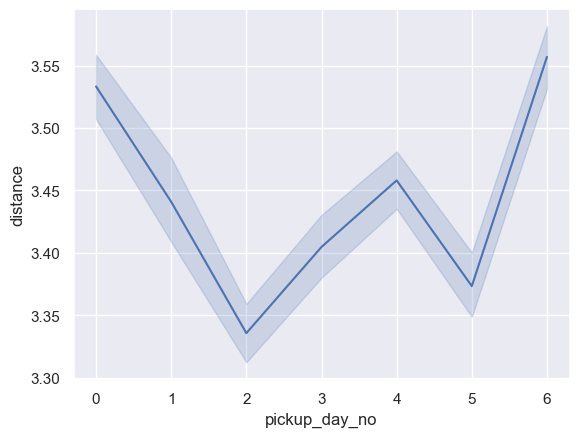

In [58]:
sns.lineplot(x='pickup_day_no',y='distance',data=data)

1. Distances are longer on Sundays probably because it’s weekend.
2. Monday trip distances are also quite high.
3. This probably means that there can be outstation trips on these days and/or the streets are busier.

Distance per hour of day

<AxesSubplot:xlabel='pickup_hour', ylabel='distance'>

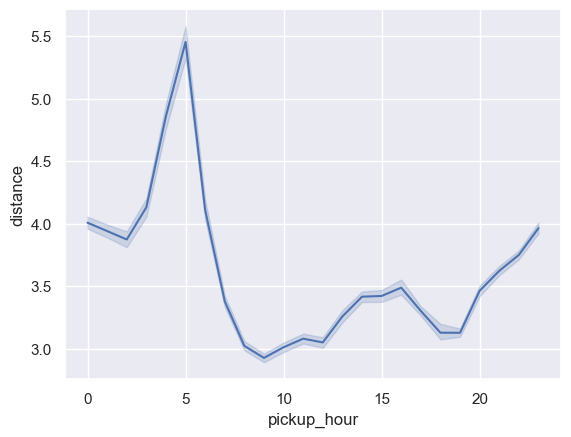

In [59]:
sns.lineplot(x='pickup_hour',y='distance',data=data)

Distances are the longest around 5 am.

Distance per time of day

<AxesSubplot:xlabel='pickup_timeofday', ylabel='distance'>

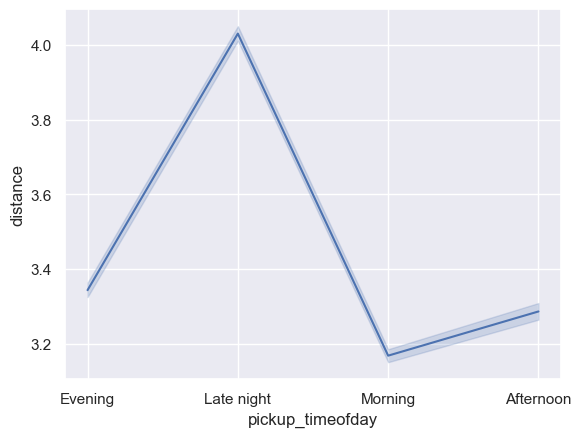

In [60]:
sns.lineplot(x='pickup_timeofday',y='distance',data=data)

As seen above also, distances being the longest during late night or it maybe called as early morning too.
This can probably point to outstation trips where people start early for the day.

Distance per month

<AxesSubplot:xlabel='pickup_month', ylabel='distance'>

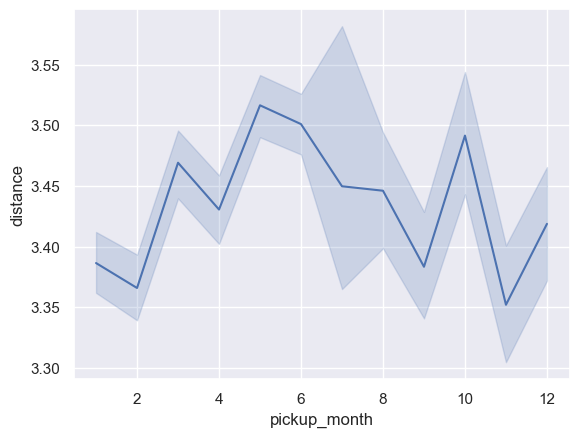

In [61]:
sns.lineplot(x='pickup_month',y='distance',data=data)

As we also saw during trip duration per month, similarly trip distance is the lowest in February and the maximum in June.

Passenger Count and Vendor id

<AxesSubplot:xlabel='vendor_id', ylabel='passenger_count'>

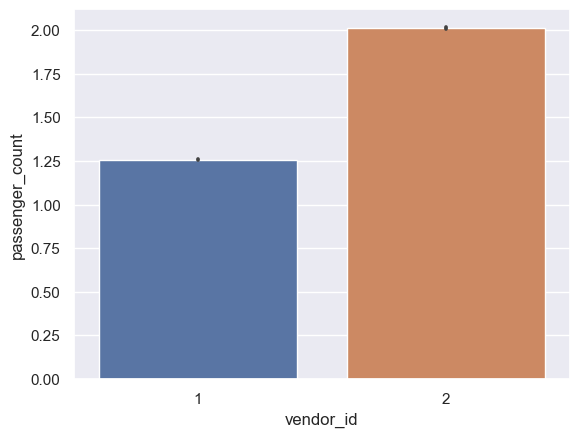

In [62]:
sns.barplot(y='passenger_count',x='vendor_id',data=data)

This shows that vendor 2 generally carries 2 passengers while vendor 1 carries 1 passenger rides.

Trip Duration and Distance

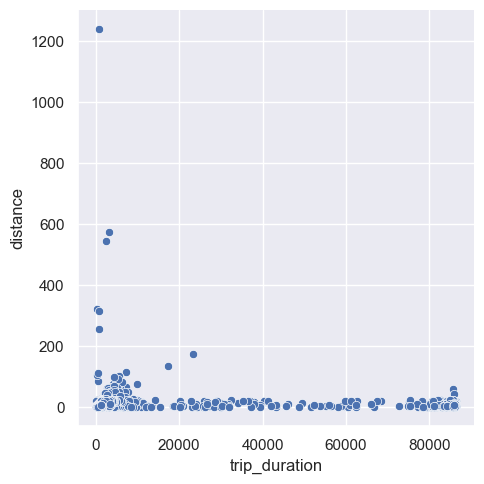

In [63]:
sns.relplot(y=data.distance,x='trip_duration',data=data)

We can see there are trips which trip duration as short as 0 seconds and yet covering a large distance. And, trips with 0 km distance and long trip durations.

To check few rows whose distance are zero

In [64]:
data[data.distance==0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
263,id3155891,2,2016-06-28 11:21:00,2016-06-28 11:25:00,2,-73.996422,40.298828,-73.996422,40.298828,N,...,Tuesday,1,1,11,11,6,6,Morning,Morning,0.0
327,id0786923,2,2016-03-26 13:34:00,2016-03-26 13:37:00,1,-73.996323,40.753460,-73.996323,40.753460,N,...,Saturday,5,5,13,13,3,3,Afternoon,Afternoon,0.0
795,id2323213,2,2016-06-13 16:49:00,2016-06-13 17:04:00,5,-73.967171,40.763500,-73.967171,40.763500,N,...,Monday,0,0,16,17,6,6,Evening,Evening,0.0
1176,id3235868,1,2016-02-29 21:39:00,2016-02-29 21:44:00,1,-73.995232,40.744038,-73.995232,40.744038,N,...,Monday,0,0,21,21,2,2,Evening,Evening,0.0
1257,id1865738,2,2016-03-13 11:38:00,2016-03-13 12:00:00,2,-73.912781,40.804428,-73.912781,40.804428,N,...,Sunday,6,6,11,12,3,3,Morning,Afternoon,0.0


In [65]:
data[data.distance==0].tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
728720,id3423342,2,2016-05-05 21:32:00,2016-05-05 21:32:00,2,-73.977898,40.766392,-73.977898,40.766392,N,...,Thursday,3,3,21,21,5,5,Evening,Evening,0.0
728775,id2618105,2,2016-03-13 20:06:00,2016-03-13 20:14:00,1,-73.974258,40.759895,-73.974258,40.759895,N,...,Sunday,6,6,20,20,3,3,Evening,Evening,0.0
728838,id1232120,2,2016-05-29 04:04:00,2016-05-29 04:11:00,2,-73.984558,40.750839,-73.984558,40.750839,N,...,Sunday,6,6,4,4,5,5,Late night,Late night,0.0
729025,id3524028,2,2016-06-04 18:03:00,2016-06-04 18:26:00,1,-74.083611,40.632401,-74.083611,40.632401,N,...,Saturday,5,5,18,18,6,6,Evening,Evening,0.0
729308,id3477255,2,2016-01-20 08:22:00,2016-01-20 08:47:00,1,-73.977859,40.749538,-73.977859,40.749538,N,...,Wednesday,2,2,8,8,1,1,Morning,Morning,0.0


We can see even though distance is recorded as 0 but trip duration is definitely more.

1. One reason can be that the dropoff coordinates weren’t recorded.
2. Another reason one can think is that for short trip durations, maybe the passenger changed their mind and cancelled the ride after some time.